In [93]:
from matplotlib import pyplot as plt
from utils import error_analysis
import numpy as np

# 1. Steels

In [80]:
ea = error_analysis('matbench_steels','sigma_error')

In [81]:
ea.run_pca()

--------------------------------------------------
Component 1
--------------------------------------------------
-22.1% of ElementProperty|MagpieData mean NUnfilled
21.9% of ElementProperty|MagpieData mean NValence
-21.6% of ElementProperty|MagpieData mean NsUnfilled
-21.6% of ElementProperty|MagpieData avg_dev NsUnfilled
21.4% of ElementProperty|MagpieData mean NdValence
-21.3% of ElementProperty|MagpieData avg_dev MeltingT
21.2% of ElementFraction|Ni
-21.1% of ElementFraction|Cr
-20.8% of ElementProperty|MagpieData mean MeltingT
19.5% of ElementProperty|MagpieData mean Column


--------------------------------------------------
Component 2
--------------------------------------------------
23.7% of ValenceOrbital|avg p valence electrons
23.5% of ValenceOrbital|frac p valence electrons
22.9% of ElementProperty|MagpieData avg_dev MendeleevNumber
22.2% of ElementFraction|Si
-21.9% of TMetalFraction|transition metal fraction
21.8% of ElementProperty|MagpieData avg_dev GSvolume_pa
21.3% 

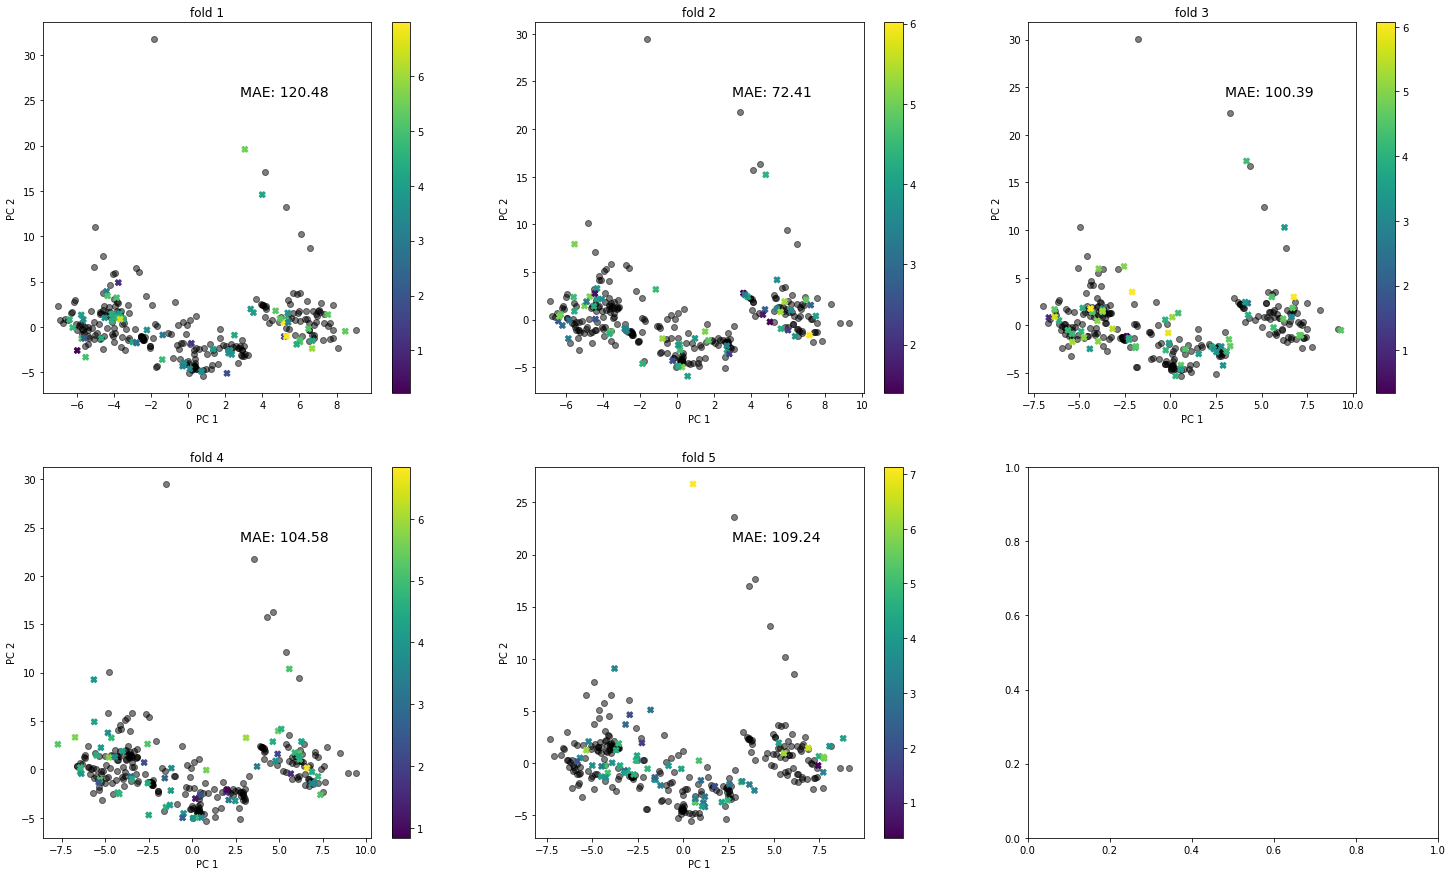

In [82]:
fig, axs = ea.plot_pca()

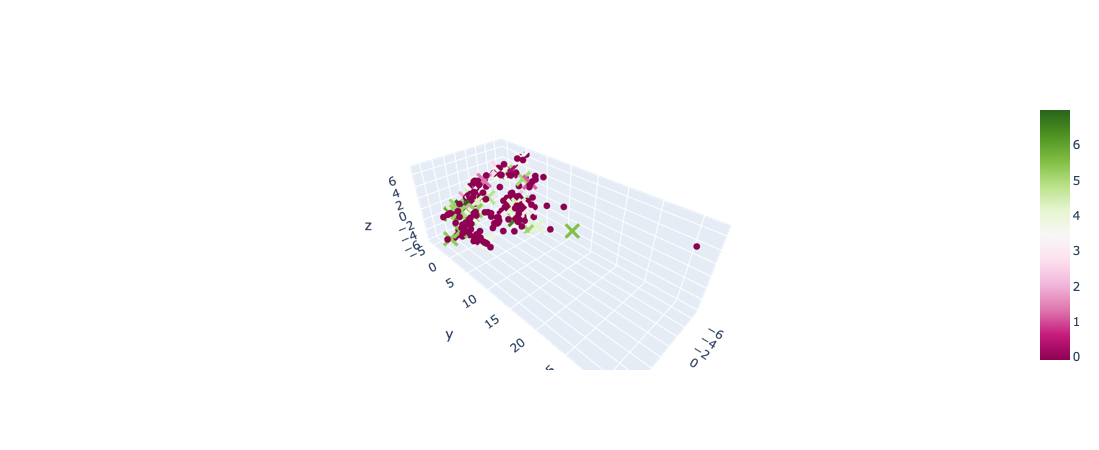

In [83]:
fig = ea.plot_pca_3D(fold=0)

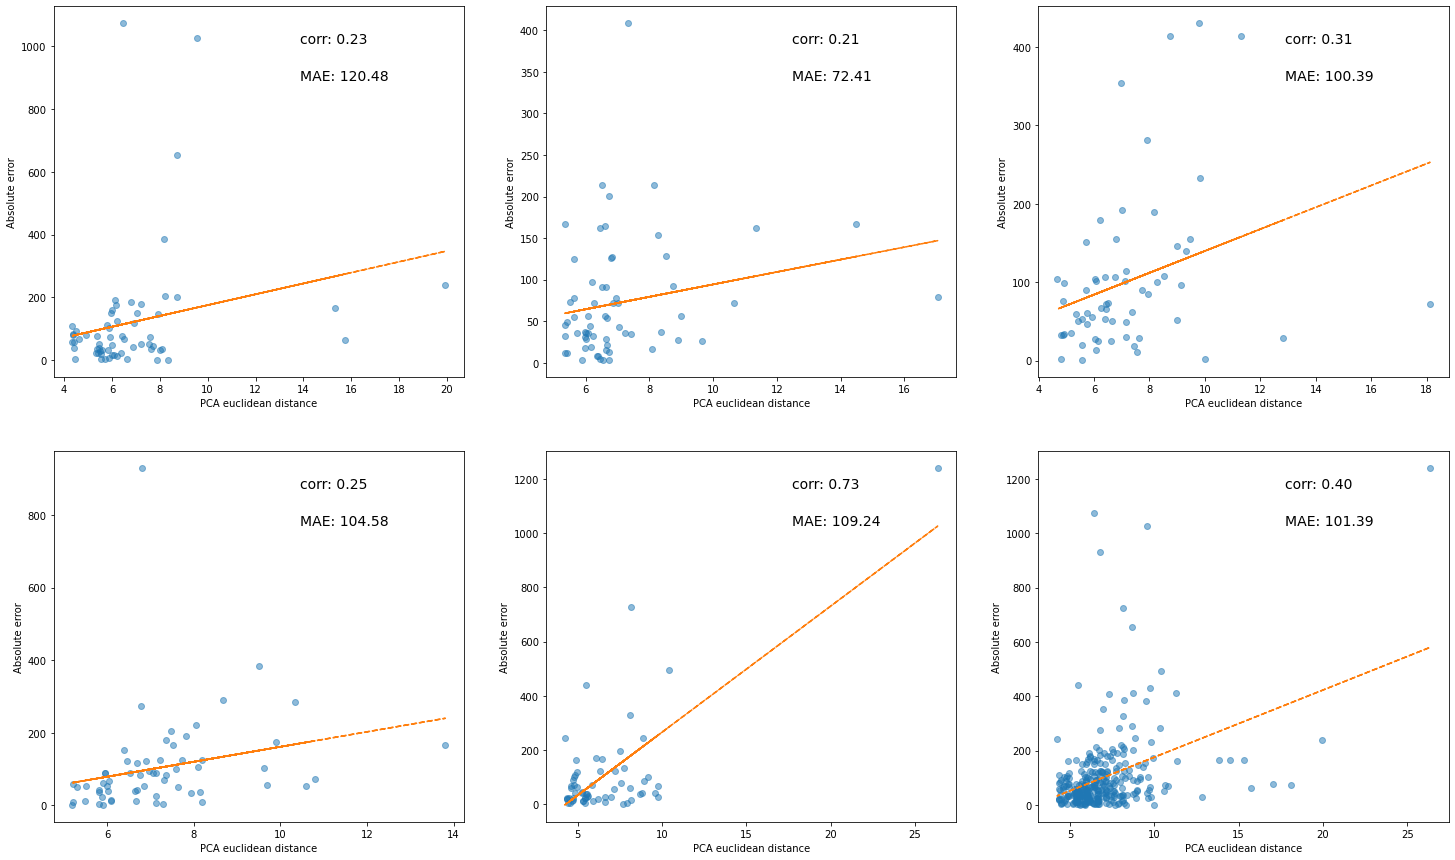

In [84]:
fig,axs = ea.plot_pca_distance(n_neighbours = 25, n_pc = 10,xmax=None)

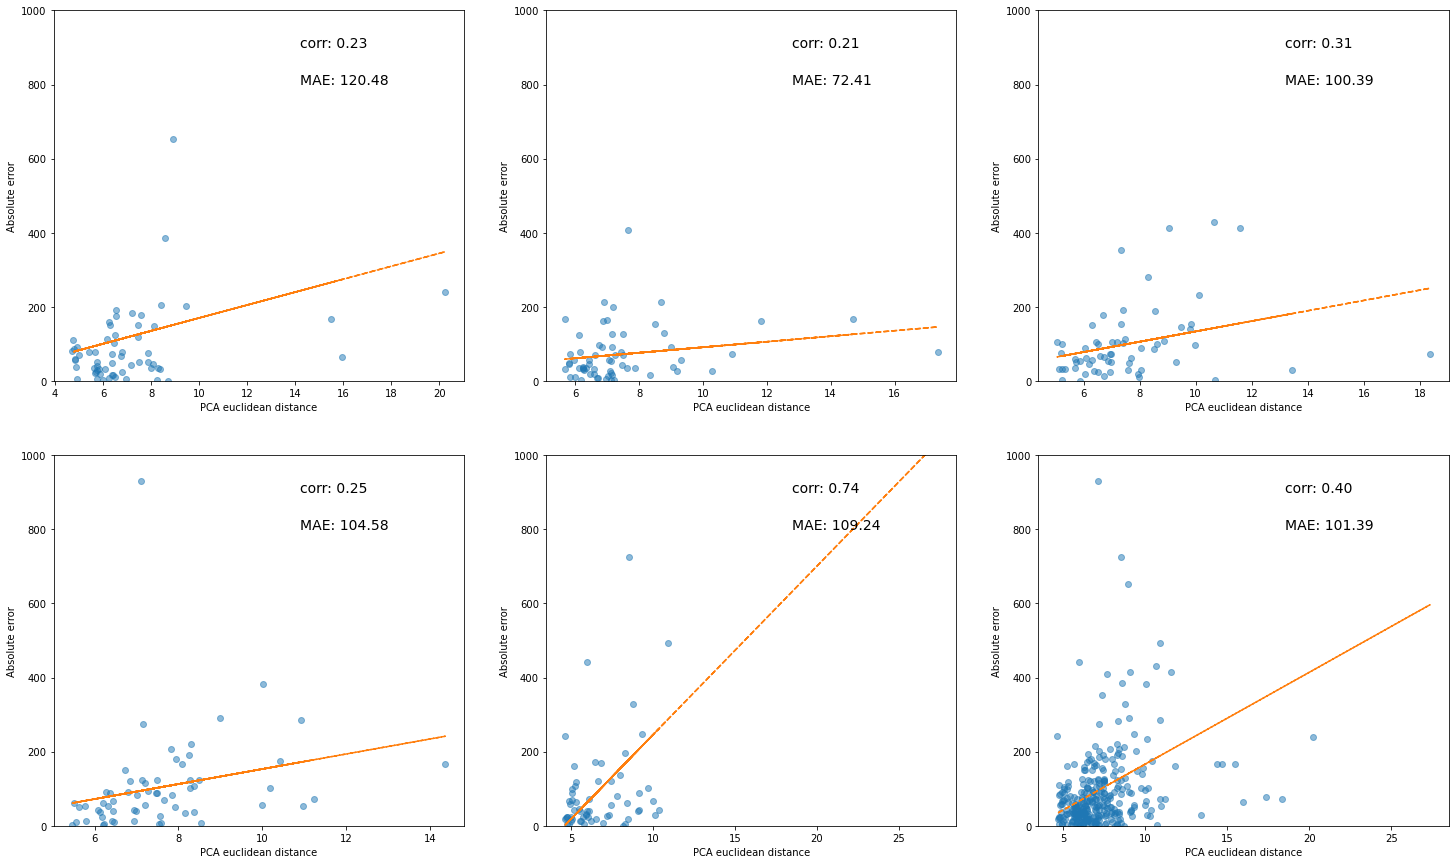

In [85]:
fig, axs = ea.plot_feat_distance(n_neighbours = 25, n_feat = 200, scaling= 'n',ymax=1000)

# 2. Dielectric

In [103]:
ea = error_analysis_ox('matbench_dielectric','n_error')

In [104]:
!pwd

/Users/ppdebreuck/Research/modnet-matbench/PCA_analysis


In [117]:
from modnet.preprocessing import MODData
md = MODData.load('../matbench_dielectric/precomputed/dielectric_benchmark_moddata.pkl.gz')
df = md.df_featurized
x_all = df[md.optimal_features[:512]].values

INFO:root:Loaded <modnet.preprocessing.MODData object at 0x7f8d29c60a30> object, created with modnet version 0.1.8~develop


In [137]:
is_oxid = np.array(list(df['ElementFraction|O']>0),dtype='int')
is_oxid

array([0, 1, 1, ..., 0, 1, 0])

In [141]:
is_oxid.sum()

2259

In [119]:
ea.run_pca()

--------------------------------------------------
Component 1
--------------------------------------------------
11.1% of ElementProperty|MagpieData mean CovalentRadius
11.1% of ElementProperty|MagpieData mean Row
-10.8% of GeneralizedRDF|mean Gaussian center=1.0 width=1.0
10.5% of AverageBondLength|mean Average bond length
-10.4% of AGNIFingerPrint|mean AGNI eta=1.23e+00
-10.3% of AGNIFingerPrint|mean AGNI eta=1.88e+00
10.2% of ElementProperty|MagpieData mean Number
10.1% of ElementProperty|MagpieData mean AtomicWeight
9.6% of ElementProperty|MagpieData minimum CovalentRadius
-9.4% of AGNIFingerPrint|mean AGNI eta=2.89e+00


--------------------------------------------------
Component 2
--------------------------------------------------
-13.2% of StructuralHeterogeneity|max relative bond length
-13.2% of StructuralHeterogeneity|mean absolute deviation in relative bond length
-13.1% of BondOrientationParameter|std_dev BOOP Q l=6
-13.1% of StructuralHeterogeneity|avg_dev neighbor dista

In [123]:
x_all.shape

(4764, 512)

In [125]:
x_all_pc = ea.pca.transform(x_all)

In [142]:
def plot_pc_ox(obj,pc1=1,pc2=2):
    fig, axs = plt.subplots(2,3,figsize=(25,15))

    for fold in range(6):
        if fold ==5:
            x_all_pc = obj.pca.transform(obj.scaler.transform(x_all))
            ax = (axs.flat)[fold]
            ax.scatter(x_all_pc[:,pc1-1],x_all_pc[:,pc2-1],c=1-is_oxid,alpha=0.5)
            ax.set_xlabel('PC {}'.format(pc1))
            ax.set_ylabel('PC {}'.format(pc2))
            ax.set_title('fold {}'.format(fold+1))

            #MAE
            #mae = np.mean(np.absolute(self.errors[fold]))
            #ax.text(0.6,0.8,'MAE: {:.2f}'.format(mae),transform=ax.transAxes,fontsize=14)
        else:
            ax = (axs.flat)[fold]
            ax.scatter(obj.x_train_pc[fold][:,pc1-1],obj.x_train_pc[fold][:,pc2-1],c='k',alpha=0.5)
            sc = ax.scatter(obj.x_test_pc[fold][:,pc1-1],obj.x_test_pc[fold][:,pc2-1],marker='X',c=np.log(1+np.abs(obj.errors[fold])))
            fig.colorbar(sc, ax=ax)
            ax.set_xlabel('PC {}'.format(pc1))
            ax.set_ylabel('PC {}'.format(pc2))
            ax.set_title('fold {}'.format(fold+1))

            #MAE
            mae = np.mean(np.absolute(obj.errors[fold]))
            ax.text(0.6,0.8,'MAE: {:.2f}'.format(mae),transform=ax.transAxes,fontsize=14)
    return fig, axs

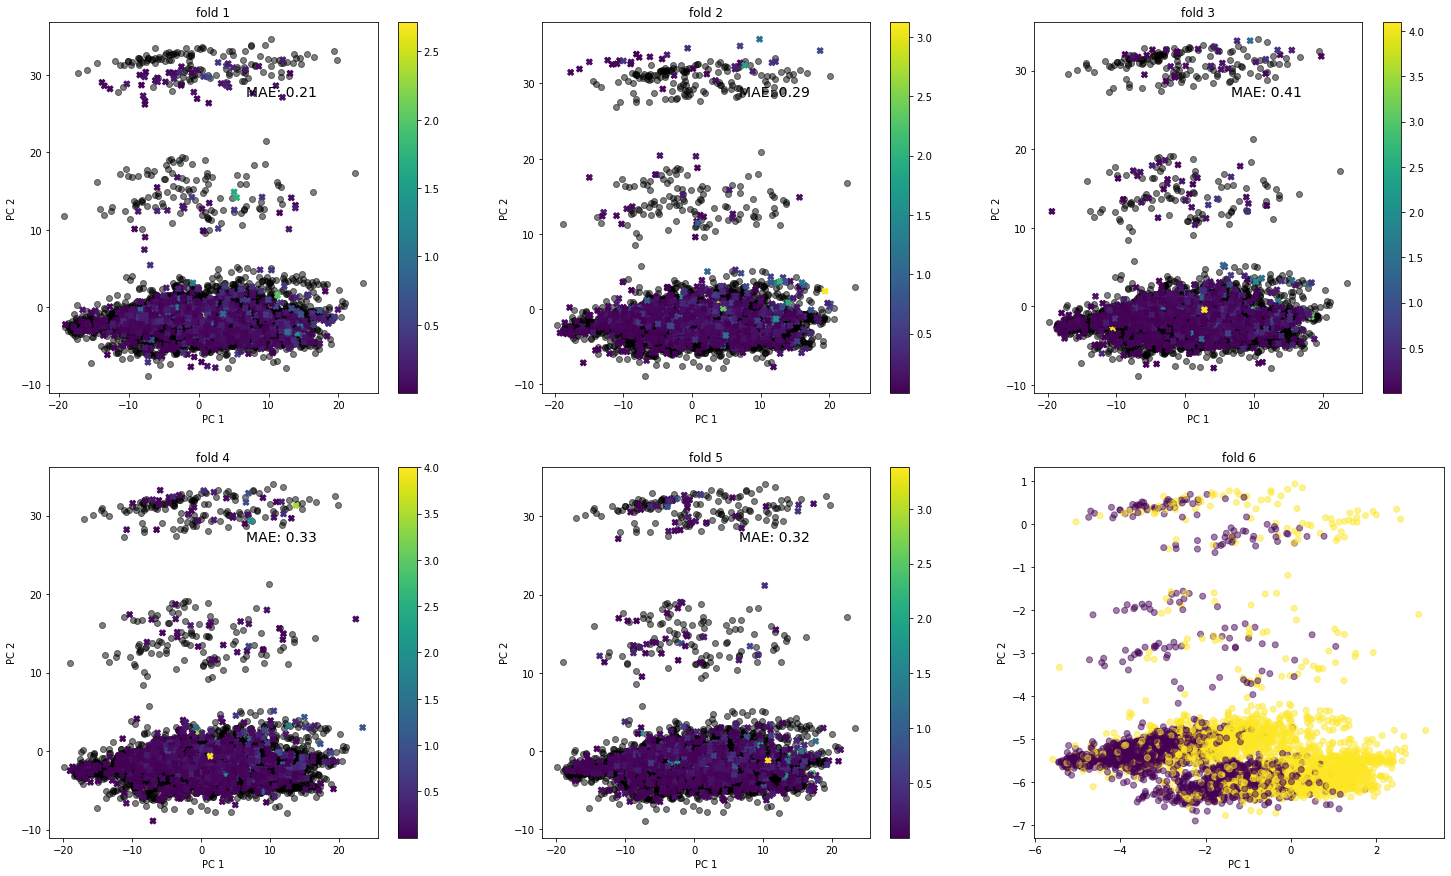

In [148]:
fig,ax = plot_pc_ox(ea,pc1=1,pc2=2)

In [69]:
#fig = ea.plot_pca_3D(fold=0)

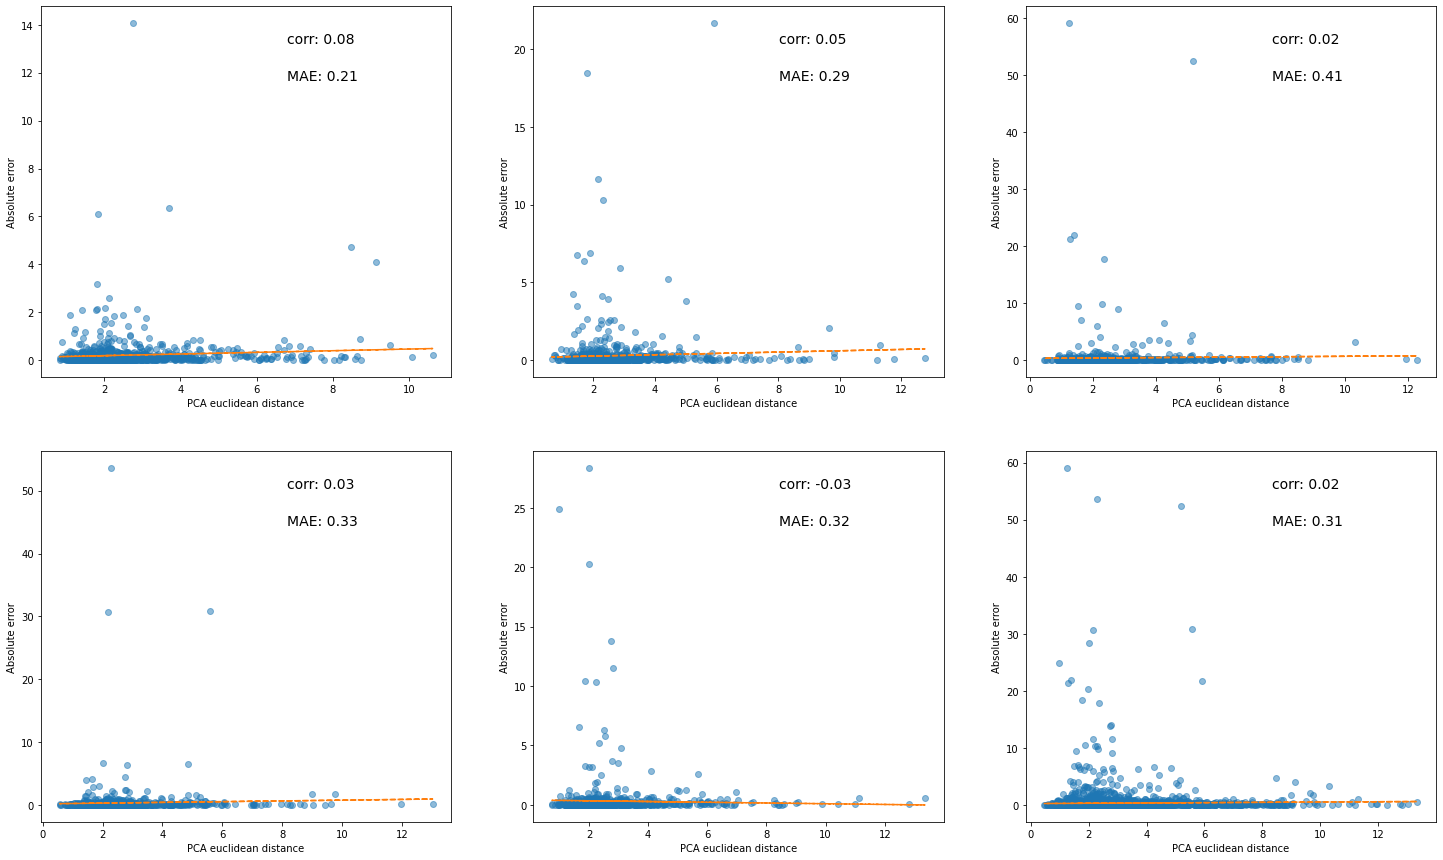

In [14]:
fig,axs = ea.plot_pca_distance(n_neighbours = 5, n_pc = 5)

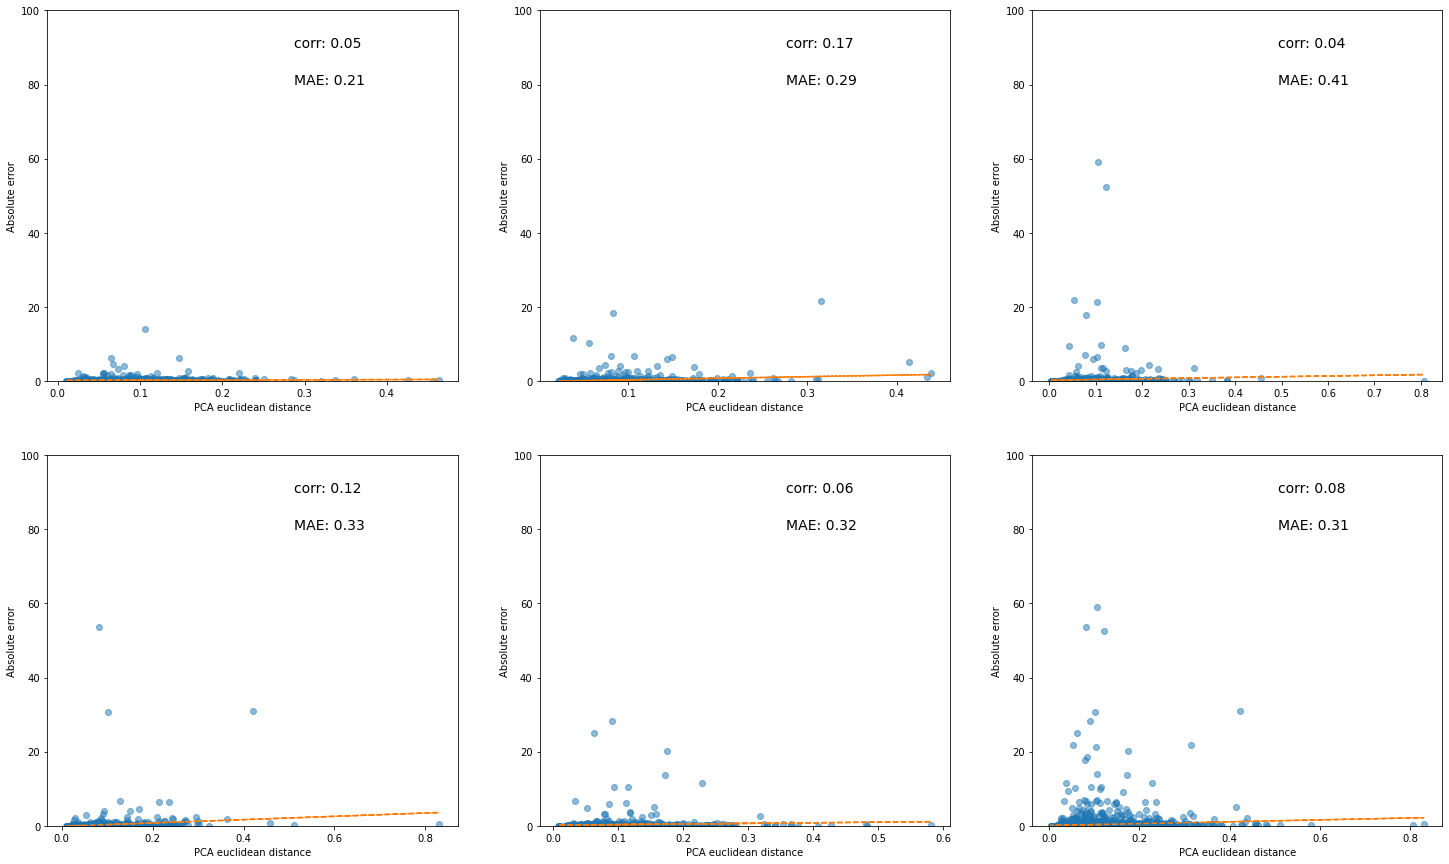

In [17]:
fig, axs = ea.plot_feat_distance(n_neighbours = 5, n_feat = 7, scaling= 'mm',ymax=100)

# 3. Expt gap

In [27]:
ea = error_analysis('matbench_expt_gap','E_g_error')

In [28]:
ea.run_pca()

--------------------------------------------------
Component 1
--------------------------------------------------
-17.1% of ValenceOrbital|frac p valence electrons
-16.7% of ElementProperty|MagpieData maximum Electronegativity
16.2% of ElementProperty|MagpieData minimum CovalentRadius
16.1% of ElementProperty|MagpieData mode CovalentRadius
15.7% of ElementProperty|MagpieData mode Row
-15.7% of ElementProperty|MagpieData range Electronegativity
15.6% of ElementProperty|MagpieData mean Row
-15.4% of ElementProperty|MagpieData mean Electronegativity
-15.1% of IonProperty|max ionic char
-15.1% of ElementProperty|MagpieData mode Electronegativity


--------------------------------------------------
Component 2
--------------------------------------------------
21.5% of ElementProperty|MagpieData minimum Column
21.5% of ElementProperty|MagpieData mean MendeleevNumber
21.0% of ElementProperty|MagpieData mean Column
19.1% of ElementProperty|MagpieData minimum MendeleevNumber
17.8% of ElementPr

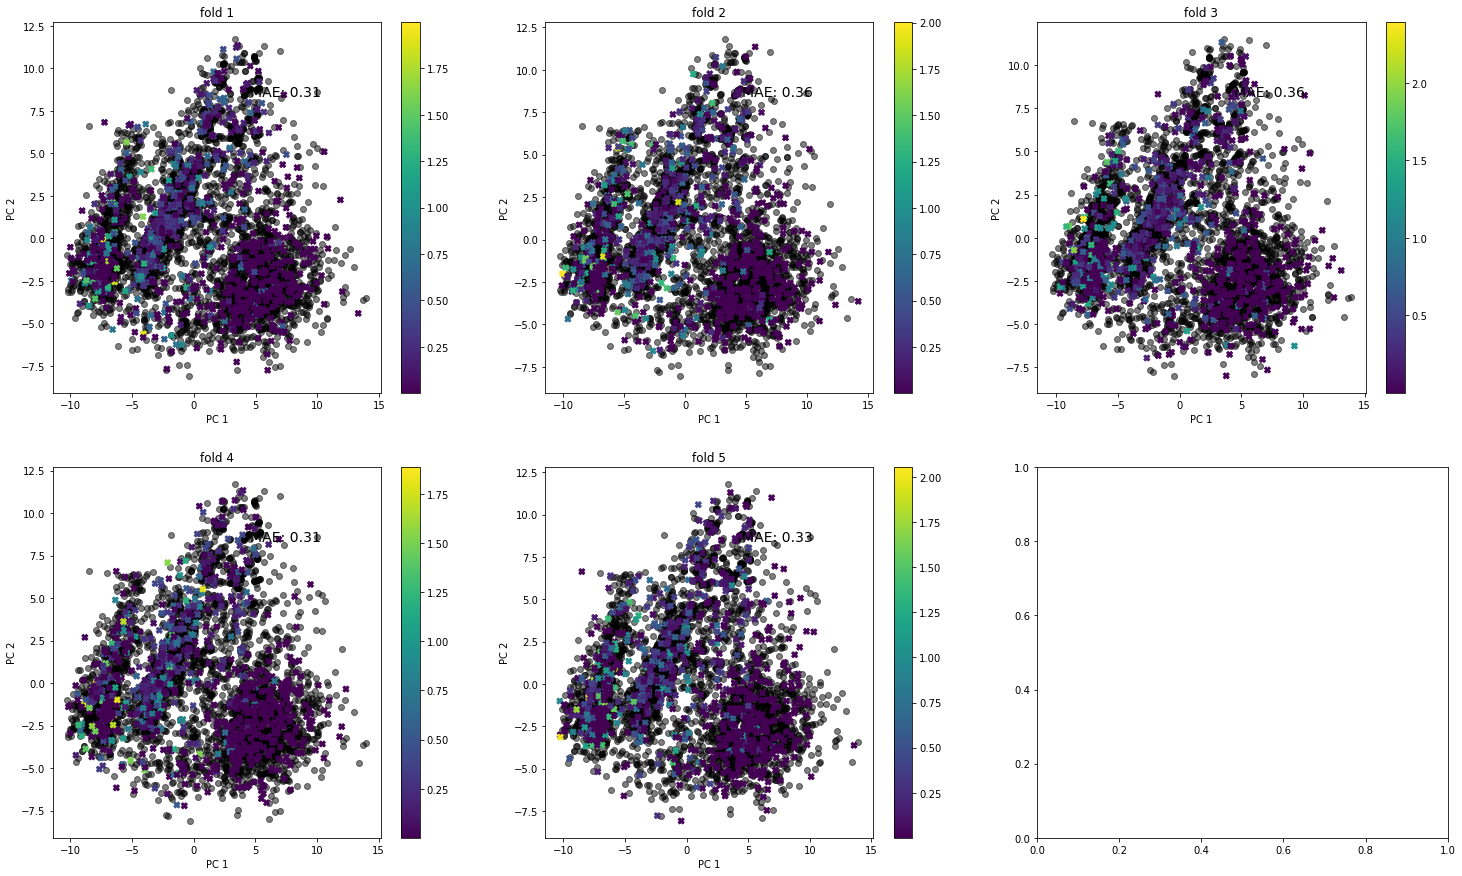

In [29]:
fig, axs = ea.plot_pca()

In [30]:
fig = ea.plot_pca_3D(fold=0)

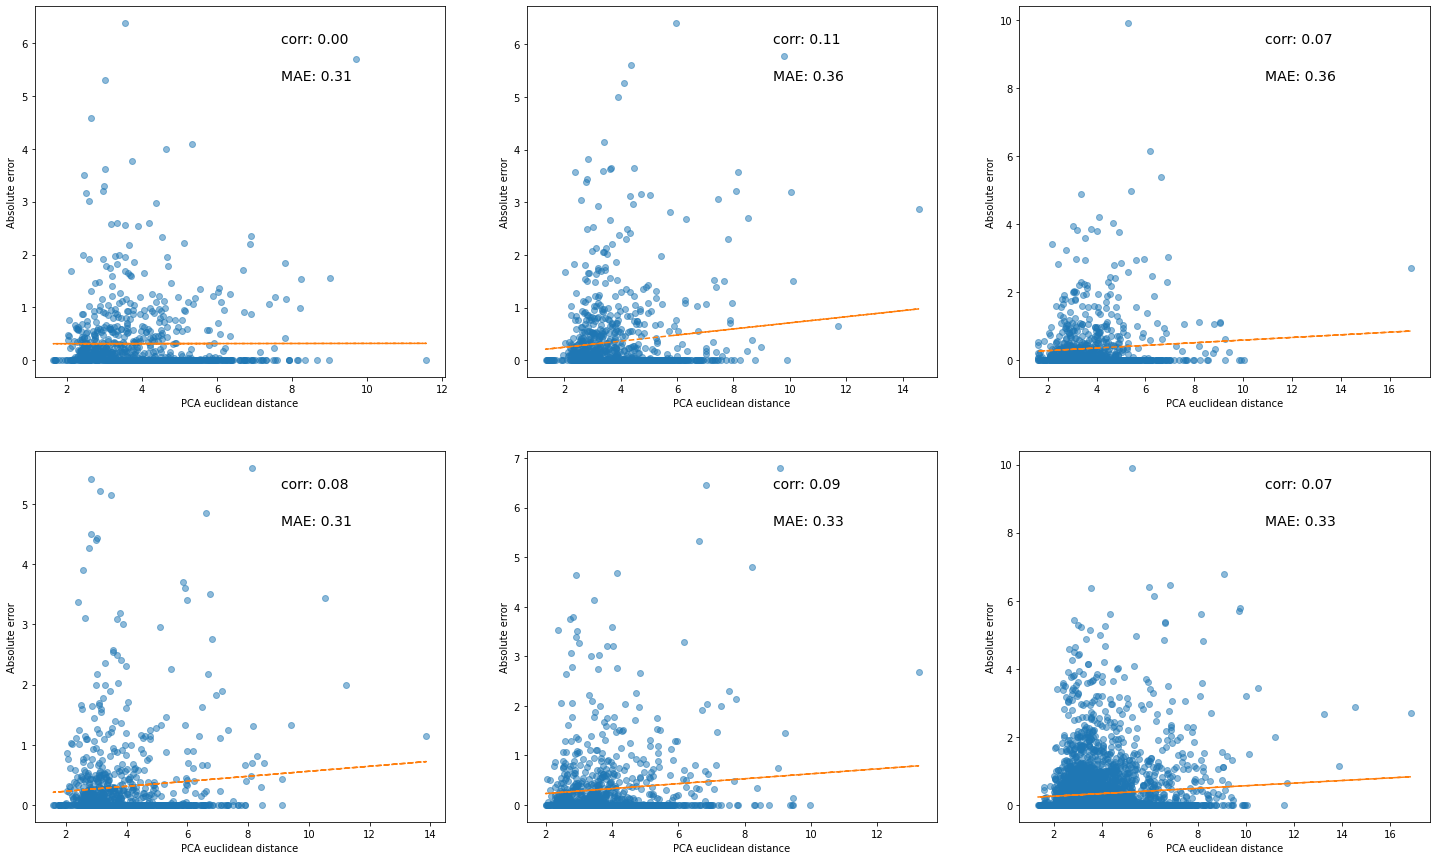

In [31]:
fig,axs = ea.plot_pca_distance(n_neighbours = 25, n_pc = 10)

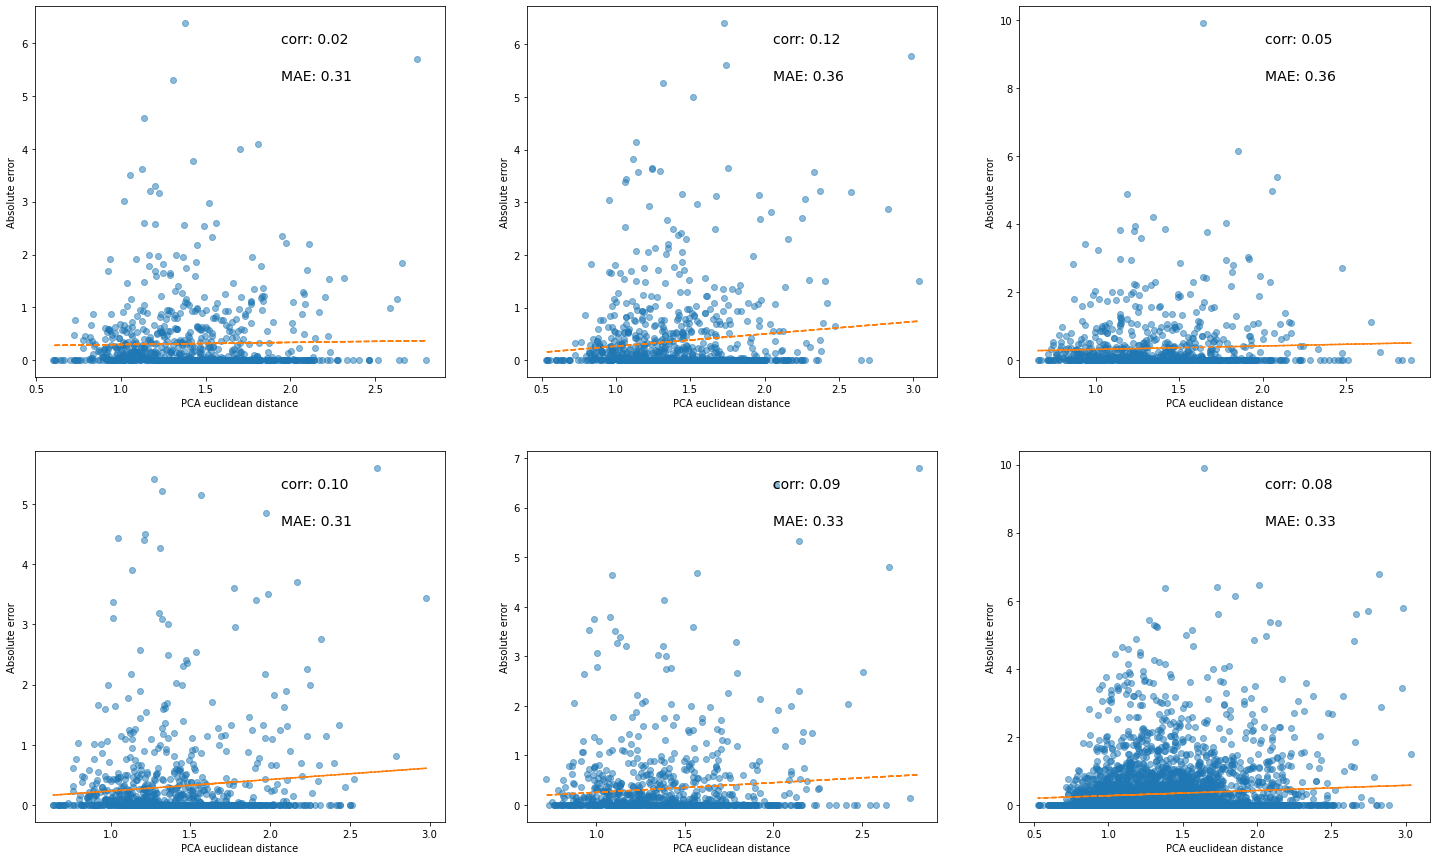

In [35]:
fig, axs = ea.plot_feat_distance(n_neighbours = 25, n_feat = 500, scaling= 'mm')